In [23]:
!pip install ipympl

In [24]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

This part is needed only if the code is executed on google colab

In [25]:
#from google.colab import output
#output.enable_custom_widget_manager()

Text(0.5, 0, 'Z Label')

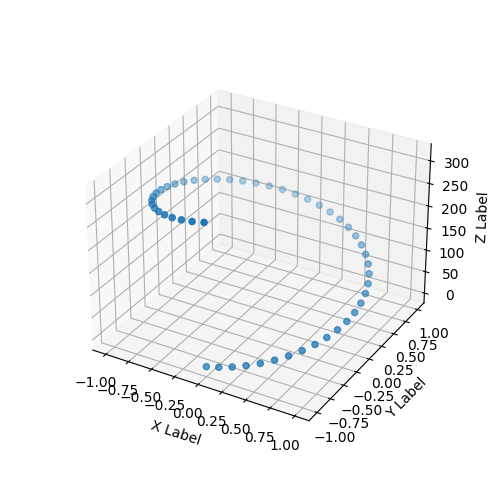

In [26]:
rng = np.random.RandomState(1)
theta = np.linspace(0, 100*np.pi)
x = np.cos(theta - np.pi/2)
y = np.sin(theta - np.pi/2)
z = theta

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')
X = np.array(list(zip(x,y,z)))

ax.scatter(X[:, 0], X[:, 1], X[:, 2], marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

Standardize the data

Text(0.5, 0, 'Z Label')

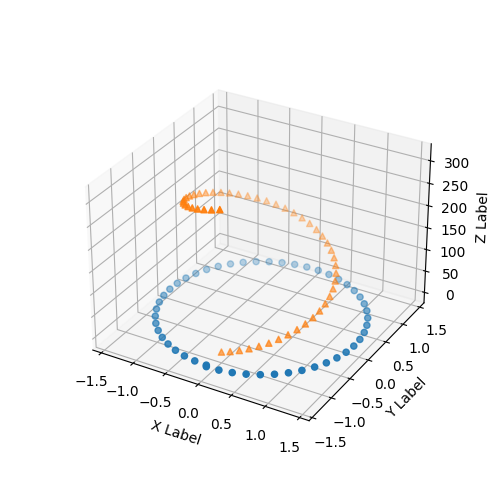

In [27]:
X_scaled = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')

ax.scatter(X_scaled[:,0], X_scaled[:,1], X_scaled[:,2], marker='o')
ax.scatter(X[:,0], X[:,1], X[:,2], marker='^')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

In [28]:
print(f'Shape of X_scaled: {X_scaled.shape}')
features = X_scaled.T
print(f'Shape of features: {features.shape}')

Shape of X_scaled: (50, 3)
Shape of features: (3, 50)


Shape of cov_matrix: (3, 3)


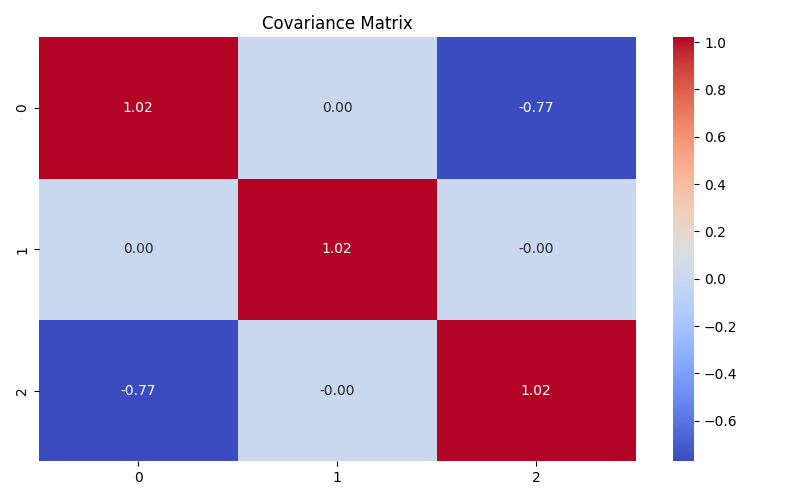

In [29]:
cov_matrix = np.cov(X_scaled, rowvar=False)

print(f'Shape of cov_matrix: {cov_matrix.shape}')

plt.figure(figsize=(8, 5))

sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Covariance Matrix')

plt.tight_layout()
plt.show()

Find the Eigen decomposition. Use library functions

In [30]:
eig_values, eig_vectors = np.linalg.eig(cov_matrix)

Sort the eigen values and the eigen vectors an print them

In [31]:
sorted_indices = np.argsort(eig_values)[::-1]

sorted_eig_values = eig_values[sorted_indices]
sorted_eig_vectors = eig_vectors[:, sorted_indices]

print(f'Eigenvalues: {sorted_eig_values}')

print("This is the list of eigenvectors: ")
for v in sorted_eig_vectors:
    print(v)

Eigenvalues: [1.79136492 1.02040816 0.2494514 ]
This is the list of eigenvectors: 
[-7.07106781e-01 -4.89619973e-15  7.07106781e-01]
[-4.24718226e-15  1.00000000e+00  2.67708980e-15]
[7.07106781e-01 1.11022302e-15 7.07106781e-01]


Calculate the cumulative variance expressed by each eigen value

Eigenvalues upto 1 expresses 58.51792087449175 % variance
Eigenvalues upto 2 expresses 91.85125420782508 % variance
Eigenvalues upto 3 expresses 100.0 % variance


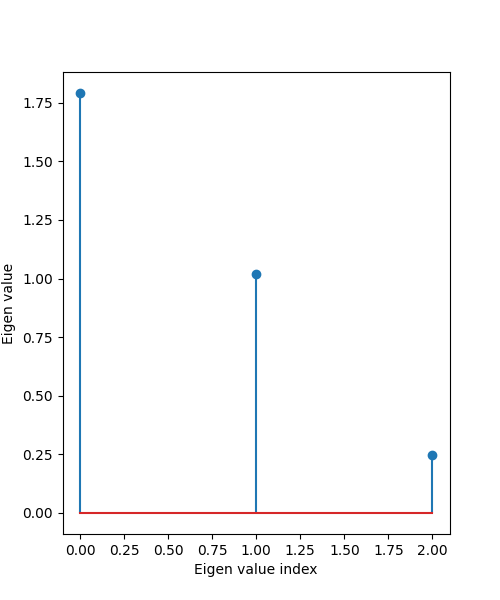

In [32]:
cum_var_exp = []
for i in range(len(sorted_eig_values)):
    exp_var = np.sum(sorted_eig_values[:i+1]) / np.sum(sorted_eig_values) * 100
    print(f'Eigenvalues upto {i+1} expresses {exp_var} % variance')
    cum_var_exp.append(exp_var)

plt.figure(figsize=(5,6))
plt.stem(sorted_eig_values)
plt.xlabel('Eigen value index')
plt.ylabel('Eigen value')
plt.show()

We can use the elbow plot to determine the optimal number of principal components to explain more than 90% of the variance, in our case, it is possible to see in the plot that the value is 2. It was already possible to observe the same thing in the printed values above.

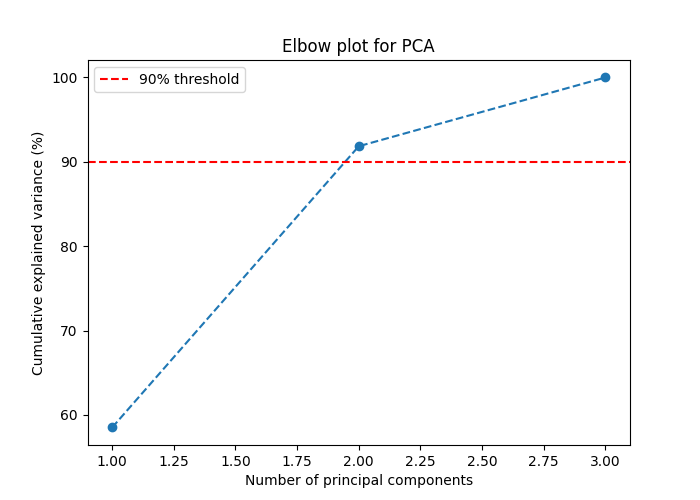

In [33]:
plt.figure(figsize=(7, 5))
plt.plot(range(1, len(cum_var_exp) + 1), cum_var_exp, marker='o', linestyle='--')
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance (%)')
plt.title('Elbow plot for PCA')
plt.axhline(y=90, color='r', linestyle='--', label='90% threshold')
plt.legend(loc='best')
plt.show()

Choose a subset of vectors to use

In [34]:
reduced_eigen_space = sorted_eig_vectors[:, :2]
print(reduced_eigen_space)
print(f'Shape of X_scaled: {X_scaled.shape}')
print(f'Shape of reduced_eigen_space: {reduced_eigen_space.shape}')

[[-7.07106781e-01 -4.89619973e-15]
 [-4.24718226e-15  1.00000000e+00]
 [ 7.07106781e-01  1.11022302e-15]]
Shape of X_scaled: (50, 3)
Shape of reduced_eigen_space: (3, 2)


Transform the scaled data using the reduced eigen space

Shape of X_compressed: (50, 2)


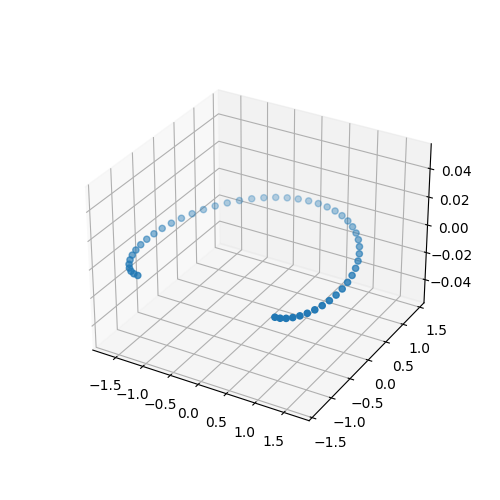

In [35]:
X_compressed = np.dot(X_scaled, reduced_eigen_space)
print(f'Shape of X_compressed: {X_compressed.shape}')

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')

ax.scatter(X_compressed[:, 0], X_compressed[:, 1], marker='o')

To verify that we can indeed go back and forth among representations, get the reconstructed data using the transpose of the previous transformation

In [36]:
X_reconstructed = np.dot(X_compressed, reduced_eigen_space.T)
print(f'Shape of X_reconstructed: {X_reconstructed.shape}')

Shape of X_reconstructed: (50, 3)


Reconstruct the data (i.e. reverse the standardization that you had used) to visualize it

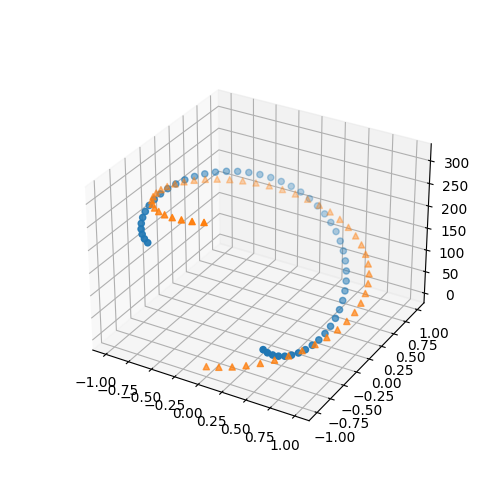

In [37]:
data_reconstructed = (X_reconstructed * np.std(X, axis=0)) + np.mean(X, axis=0)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')

ax.scatter(data_reconstructed[:, 0], data_reconstructed[:, 1], data_reconstructed[:, 2], marker='o')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], marker='^')